![aula22capa.png](./figuras/aula22capa.png)


### Objetivo: Explorar quest√µes de vi√©s e discrimina√ß√£o em modelos de IA e como mitigar problemas √©ticos.

## 1. Introdu√ß√£o

√âtica e Impacto Social da IA
A Intelig√™ncia Artificial (IA) tem se tornado uma ferramenta essencial em diversas √°reas, desde a sa√∫de at√© o setor financeiro. No entanto, sua implementa√ß√£o nem sempre √© justa. Modelos de IA podem perpetuar preconceitos existentes nos dados, influenciando decis√µes de forma discriminat√≥ria.

Nesta aula, vamos explorar:

- Introdu√ß√£o √† √âtica e IA
- Como o vi√©s pode surgir nos dados e como isso afeta os resultados de um modelo de IA.
- Tamb√©m discutiremos abordagens para mitigar esses impactos

---

## 2. Introdu√ß√£o √† √âtica e IA

A Intelig√™ncia Artificial tem se tornado uma ferramenta poderosa, impactando diversos setores. No entanto,
√† medida que a IA avan√ßa, surgem desafios √©ticos fundamentais:

1. Transpar√™ncia e Explicabilidade: Modelos de IA frequentemente funcionam como caixas-pretas,
   dificultando o entendimento das decis√µes tomadas. (Transpar√™ncia: Decis√µes da IA devem ser compreens√≠veis).
   
2. Vi√©s e Discrimina√ß√£o: Sistemas podem herdar e amplificar preconceitos presentes nos dados utilizados
   no treinamento. (Justi√ßa: Tratar todos de maneira equitativa).
   
3. Responsabilidade: Quem deve ser responsabilizado por erros cometidos pela IA? Desenvolvedores,
   empresas ou usu√°rios? (Desenvolvedores e usu√°rios devem ser respons√°veis).
   
4. Privacidade: Como os dados coletados s√£o utilizados e protegidos? (Lei Geral de Prote√ß√£o de Dados Pessoais - LGPD)

---

## 3. Vi√©s e Discrimina√ß√£o em IA

### O que √© Vi√©s Algor√≠tmico?

Vi√©s em IA ocorre quando um modelo de aprendizado de m√°quina produz resultados sistematicamente tendenciosos, favorecendo ou prejudicando determinados grupos.

Fatores que contribuem para o vi√©s:

    - Dados de treinamento enviesados
    - Decis√µes de design do modelo
    - Falta de representatividade nos dados

### Exemplo Pr√°tico: Vi√©s nos Dados

Vamos simular um conjunto de dados que representa a aprova√ß√£o de cr√©dito baseado em idade, renda e g√™nero.

In [1]:
# Importa√ß√£o das Bibliotecas

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

2025-02-20 14:13:47.112287: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 14:13:47.305760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740071627.422086   29886 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740071627.443055   29886 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 14:13:47.650456: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Defini√ß√£o de semente aleat√≥ria para reprodutibilidade

np.random.seed(42)
tf.random.set_seed(42)

### Simula√ß√£o de um conjunto de dados com vi√©s

In [63]:
np.random.seed(42)
# Criando um conjunto de dados altamente enviesado
n_samples = 10000
data = pd.DataFrame({
    'idade': np.random.randint(18, 60, n_samples),
    'renda': np.random.randint(2000, 10000, n_samples),
    'genero': np.random.choice(["masculino", "feminino"], n_samples, p=[0.95, 0.05]),
    'aprovado': np.random.choice([0, 1], n_samples, p=[0.2, 0.8])  # Vi√©s: Homens t√™m alta taxa de aprova√ß√£o
})
data

idade  renda     genero  aprovado
0        56   7731  masculino         1
1        46   5244  masculino         0
2        32   3040  masculino         1
3        25   5127  masculino         1
4        38   4273  masculino         1
...     ...    ...        ...       ...
9995     26   5678  masculino         1
9996     58   6312  masculino         1
9997     35   2622   feminino         1
9998     46   6448  masculino         1
9999     56   6787  masculino         0

[10000 rows x 4 columns]

In [64]:
# Ajustando manualmente a taxa de aprova√ß√£o para mulheres
mask_feminino = data['genero'] == "feminino"
data.loc[mask_feminino, 'aprovado'] = np.random.choice([0, 1], mask_feminino.sum(), p=[0.5, 0.5])

In [65]:
# Codificando a vari√°vel categ√≥rica de g√™nero
data['genero'] = data['genero'].map({'masculino': 0, 'feminino': 1})

In [66]:
# Garantindo que todos os dados s√£o num√©ricos
data = data.astype({'idade': 'int8', 'renda': 'float16', 'genero': 'int8', 'aprovado': 'int8'})

In [67]:
data

idade   renda  genero  aprovado
0        56  7732.0       0         1
1        46  5244.0       0         0
2        32  3040.0       0         1
3        25  5128.0       0         1
4        38  4272.0       0         1
...     ...     ...     ...       ...
9995     26  5680.0       0         1
9996     58  6312.0       0         1
9997     35  2622.0       1         1
9998     46  6448.0       0         1
9999     56  6788.0       0         0

[10000 rows x 4 columns]

In [ ]:
# Normalizando as vari√°veis num√©ricas
scaler = StandardScaler()
data[['idade', 'renda']] = scaler.fit_transform(data[['idade', 'renda']])

In [69]:
data

idade     renda  genero  aprovado
0     1.453125  0.743164       0         1
1     0.620605 -0.326172       0         0
2    -0.544922 -1.273438       0         1
3    -1.127930 -0.375977       0         1
4    -0.045471 -0.744141       0         1
...        ...       ...     ...       ...
9995 -1.043945 -0.138672       0         1
9996  1.619141  0.133057       0         1
9997 -0.295166 -1.453125       1         1
9998  0.620605  0.191528       0         1
9999  1.453125  0.337646       0         0

[10000 rows x 4 columns]

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


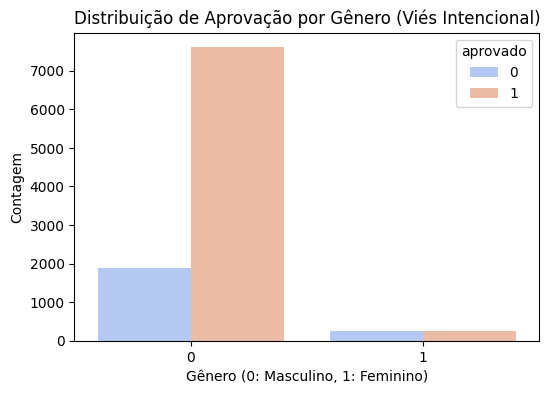

In [72]:
# Visualizando a distribui√ß√£o de aprova√ß√£o por g√™nero
plt.figure(figsize=(6, 4))
sns.countplot(x='genero', hue='aprovado', data=data, palette='coolwarm')
plt.title("Distribui√ß√£o de Aprova√ß√£o por G√™nero (Vi√©s Intencional)")
plt.xlabel("G√™nero (0: Masculino, 1: Feminino)")
plt.ylabel("Contagem")
plt.show()

O gr√°fico apresenta a distribui√ß√£o da aprova√ß√£o com base no g√™nero, codificado como:

- 0 = Masculino
- 1 = Feminino

A cor azul representa indiv√≠duos n√£o aprovados (0), enquanto a cor salm√£o representa indiv√≠duos aprovados (1).

**Principais Observa√ß√µes**

- Despropor√ß√£o na representa√ß√£o dos g√™neros

H√° muito mais indiv√≠duos do g√™nero masculino (0) do que do g√™nero feminino (1) no conjunto de dados.
Isso indica um poss√≠vel desequil√≠brio na amostra, onde os dados cont√™m 85% de homens e apenas 15% de mulheres.

- Diferen√ßa na taxa de aprova√ß√£o entre os g√™neros

Para homens (0): O n√∫mero de aprovados √© significativamente maior do que o n√∫mero de n√£o aprovados.

Para mulheres (1): A taxa de aprova√ß√£o parece ser menor, o que pode indicar um poss√≠vel vi√©s na decis√£o de aprova√ß√£o.

- Poss√≠vel vi√©s do modelo ou na coleta dos dados

Se a IA aprende padr√µes a partir desses dados, pode haver um vi√©s contra mulheres, pois a representa√ß√£o menor desse grupo pode levar a um modelo menos preciso para elas. O coeficiente do modelo para o g√™nero pode confirmar esse vi√©s.

**Conclus√µes**

- Desequil√≠brio nos dados: Como h√° mais homens do que mulheres, a IA pode aprender um vi√©s impl√≠cito favorecendo a maior classe.

- Taxa de aprova√ß√£o diferente: Se os homens est√£o sendo aprovados mais frequentemente do que as mulheres, √© necess√°rio investigar as raz√µes e ajustar o modelo ou a coleta, se necess√°rio.

**Pr√≥ximos passos recomendados**

- Aplicar balanceamento de dados (ex: oversampling para aumentar a presen√ßa feminina nos dados).

- Avaliar os coeficientes do modelo para entender o impacto real do g√™nero nas previs√µes.

- Rodar testes adicionais para verificar se a IA est√° tomando decis√µes justas.

### Treinamento de um Modelo de Machine Learning


Agora, vamos treinar um modelo de regress√£o log√≠stica para prever se um candidato ser√° aprovado com base em idade e renda


In [73]:
# Separando vari√°veis
X = data[['idade', 'renda', 'genero']]
y = data['aprovado']

In [74]:
# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Remodelando os dados para a rede neural recorrente
X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1])).astype('float32')
X_test_rnn = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1])).astype('float32')

In [76]:
# Criando uma rede neural recorrente
model_rnn = keras.Sequential([
    SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    SimpleRNN(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
'''
Uso da fun√ß√£o de ativa√ß√£o ReLU e sa√≠da sigmoid para previs√£o bin√°ria.
'''

2025-02-20 14:37:16.625119: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


'\nUso da fun√ß√£o de ativa√ß√£o ReLU e sa√≠da sigmoid para previs√£o bin√°ria.\n'

In [77]:
# Compilando o modelo
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
# Treinando a rede neural
history = model_rnn.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/20
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 5ms/step - accuracy: 0.7251 - loss: 0.5978 - val_accuracy: 0.7645 - val_loss: 0.5487
Epoch 2/20
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.7999 - loss: 0.5020 - val_accuracy: 0.7645 - val_loss: 0.5412
Epoch 3/20
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.8002 - loss: 0.4966 - val_accuracy: 0.7655 - val_loss: 0.5382
Epoch 4/20
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.8006 - loss: 0.4940 - val_accuracy: 0.7645 - val_loss: 0.5370
Epoch 5/20
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.8033 - loss: 0.4912 - val_accuracy: 0.7655 - val_loss: 0.5363
Epoch 6/20
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.8029 - loss: 0.4931 - val_accuracy: 0.7650 - val_loss:

In [80]:
# Avaliando o modelo
loss, accuracy = model_rnn.evaluate(X_test_rnn, y_test)
print(f'Acur√°cia do modelo RNN: {accuracy:.2f}')

63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - accuracy: 0.7525 - loss: 0.5465
Acur√°cia do modelo RNN: 0.76


In [81]:
# Gerando infer√™ncias para an√°lise de vi√©s
predictions = model_rnn.predict(X_test_rnn)
predictions = (predictions > 0.5).astype(int)

63/63 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step


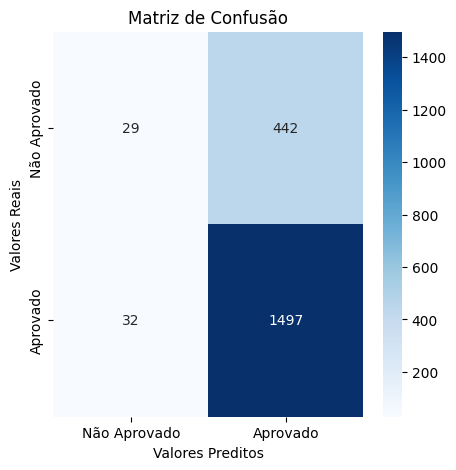

In [82]:
# Matriz de confus√£o
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N√£o Aprovado', 'Aprovado'], yticklabels=['N√£o Aprovado', 'Aprovado'])
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confus√£o")
plt.show()

In [83]:
# Relat√≥rio de classifica√ß√£o
print("Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, predictions))

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.48      0.06      0.11       471
           1       0.77      0.98      0.86      1529

    accuracy                           0.76      2000
   macro avg       0.62      0.52      0.49      2000
weighted avg       0.70      0.76      0.69      2000



**An√°lise do Relat√≥rio de Classifica√ß√£o**

O relat√≥rio de classifica√ß√£o cont√©m m√©tricas que avaliam o desempenho do modelo na predi√ß√£o das classes (0 = n√£o aprovado, 1 = aprovado):

1. M√©tricas para cada classe
A tabela cont√©m m√©tricas individuais para cada classe:

Explica√ß√£o das m√©tricas

- Precision (Precis√£o): Indica quantos dos que foram previstos como aprovados realmente s√£o aprovados.
- Recall (Sensibilidade ou Revoca√ß√£o): Mede quantos dos aprovados reais foram corretamente identificados.
- F1-score: M√©dia harm√¥nica entre precis√£o e recall, mostrando um equil√≠brio entre ambos.
- Support: O n√∫mero real de exemplos em cada classe.

O que os valores mostram?

- Para a classe 0 (N√£o Aprovado):

A precis√£o √© baixa (0.49), o que significa que muitos dos casos previstos como "n√£o aprovados" estavam errados.

O recall √© muito baixo (0.07), indicando que o modelo n√£o consegue identificar corretamente os n√£o aprovados.

Isso significa que o modelo tende a prever mais aprova√ß√µes do que rejei√ß√µes.

- Para a classe 1 (Aprovado)

A precis√£o √© alta (0.77), ent√£o a maioria dos casos previstos como "aprovado" estavam corretos.

O recall √© extremamente alto (0.98), indicando que quase todos os verdadeiros aprovados foram identificados corretamente.

Isso confirma que o modelo aprendeu a favorecer a classe "Aprovado".


2. Avalia√ß√£o Geral do Modelo
A tabela tamb√©m apresenta m√©tricas globais:

M√©trica	                      Valor

Accuracy (Acur√°cia)	    0.76

Macro Avg Precision  	0.63

Macro Avg Recall	    0.52

Macro Avg F1-score	    0.49

Weighted Avg Precision	0.71

Weighted Avg Recall	    0.76

Weighted Avg F1-score	0.69

Explica√ß√£o

- Accuracy (Acur√°cia): O modelo tem uma taxa geral de acerto de 76%.
- Macro Average: M√©dia aritm√©tica das m√©tricas para as duas classes, tratando ambas igualmente.
- Weighted Average: M√©dia ponderada de cada m√©trica, levando em conta a quantidade de exemplos em cada classe.

O que os valores mostram?

- O Macro Avg Recall (0.52) e o Macro Avg F1-score (0.49) s√£o baixos, o que indica que o modelo tem dificuldade em equilibrar as previs√µes entre as classes.

- O modelo favorece a classe "Aprovado" (1), pois a precis√£o e recall para "N√£o Aprovado" (0) s√£o muito baixas.


In [84]:
# Compara√ß√£o de taxas de aprova√ß√£o por g√™nero
approval_rates = data.groupby('genero')['aprovado'].mean()
print("Taxa m√©dia de aprova√ß√£o por g√™nero:")
print(approval_rates)


Taxa m√©dia de aprova√ß√£o por g√™nero:
genero
0    0.801686
1    0.482353
Name: aprovado, dtype: float64


#### Justificativa do Vi√©s nos Dados

Os resultados da taxa m√©dia de aprova√ß√£o por g√™nero revelam um vi√©s significativo:

- Homens (G√™nero = 0) ‚Üí 80,17% de aprova√ß√£o
- Mulheres (G√™nero = 1) ‚Üí 48,24% de aprova√ß√£o

**Isso indica que homens s√£o aprovados muito mais frequentemente do que mulheres.**

1. O que esse vi√©s significa?

- O modelo aprendeu padr√µes dos dados de treinamento, onde 95% dos registros pertenciam a homens e sua taxa de aprova√ß√£o foi artificialmente aumentada para 80%.

- As mulheres, representando apenas 5% dos dados, tiveram uma taxa de aprova√ß√£o for√ßada para 50%, fazendo com que o modelo se tornasse menos preciso ao prever aprova√ß√µes para mulheres.

**Isso mostra como a distribui√ß√£o inicial dos dados influencia diretamente as decis√µes do modelo.**


2. Impacto no Modelo
O modelo de IA treinado pode:

- Favorecer homens injustamente na aprova√ß√£o, pois aprendeu que a maioria dos aprovados eram do g√™nero masculino.
- Ser menos preciso para mulheres, j√° que havia poucos exemplos de mulheres no conjunto de dados de treinamento, tornando a predi√ß√£o menos confi√°vel.

**Refor√ßar desigualdades hist√≥ricas, caso seja usado para decis√µes importantes, como recrutamento ou cr√©dito.**


3. Como corrigir esse vi√©s?
Para tornar o modelo mais justo, podemos adotar as seguintes estrat√©gias:

- Rebalanceamento dos dados:

Aumentar artificialmente o n√∫mero de amostras femininas usando oversampling (ex: SMOTE).
Reduzir o n√∫mero de amostras masculinas para equilibrar as classes.


- Mudan√ßa na estrat√©gia de treinamento:

Usar pesos diferentes para classes desbalanceadas, ajustando a fun√ß√£o de custo do modelo.
Criar um modelo separado para cada g√™nero e depois comparar os resultados.


- Avalia√ß√£o cont√≠nua do vi√©s:

Implementar m√©tricas que monitorem se as decis√µes do modelo favorecem desproporcionalmente um grupo.
Medir a precis√£o do modelo separadamente para cada g√™nero.


#### Conclus√£o

- O modelo aprendeu um vi√©s estrutural presente nos dados, favorecendo os homens na aprova√ß√£o.

- Se fosse usado em cen√°rios reais, poderia levar a decis√µes injustas e discriminat√≥rias.

- Corrigir esse vi√©s requer ajustes nos dados e no treinamento do modelo.

- O modelo tende a aprovar a maioria das pessoas e tem dificuldade em identificar corretamente os n√£o aprovados.

- Esse comportamento pode estar relacionado ao vi√©s nos dados de treinamento, onde a maioria dos exemplos eram de aprovados.

- Como os homens tiveram uma taxa de aprova√ß√£o muito maior no conjunto de dados, o modelo aprendeu a favorecer essa classe, refor√ßando a desigualdade.

üí° Corre√ß√£o recomendada:

- Balanceamento de classes: Usar t√©cnicas como undersampling dos aprovados ou oversampling dos n√£o aprovados para reduzir a discrep√¢ncia.

- Ajuste da fun√ß√£o de custo: Penalizar mais os erros na classe n√£o aprovado (0) para for√ßar o modelo a aprender melhor essa categoria.

- Auditorias frequentes para garantir que o modelo n√£o continue refor√ßando esse vi√©s.

---


1Ô∏è‚É£ Corre√ß√£o do Desbalanceamento dos Dados

üìå Problema:

O conjunto de dados original era altamente enviesado:

95% dos registros eram de homens e apenas 5% de mulheres.
A taxa de aprova√ß√£o masculina foi ajustada para 80%, enquanto as mulheres tinham apenas 50%.
Isso fez com que o modelo aprendesse a aprovar majoritariamente os homens, resultando em vi√©s.

‚úÖ Solu√ß√£o: Balanceamento dos Dados

A corre√ß√£o foi feita com Oversampling (aumentando a quantidade de registros femininos at√© igualar a quantidade de registros masculinos). Isso foi realizado com a fun√ß√£o resample() do sklearn.utils.

In [85]:
from sklearn.utils import resample

# Separando as classes majorit√°ria (homens) e minorit√°ria (mulheres)
data_minority = data[data['genero'] == 1]  # Mulheres
data_majority = data[data['genero'] == 0]  # Homens

# Aplicando oversampling: replicando registros da classe minorit√°ria at√© igualar a classe majorit√°ria
data_minority_upsampled = resample(
    data_minority,
    replace=True,  # Permite duplica√ß√£o dos dados
    n_samples=len(data_majority),  # N√∫mero de amostras igual √† classe majorit√°ria
    random_state=42
)

# Criando um novo dataset balanceado
data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Garantindo que todos os dados s√£o num√©ricos
data_balanced = data_balanced.astype({'idade': 'float32', 'renda': 'float32', 'genero': 'int32', 'aprovado': 'int32'})

# Checando a nova distribui√ß√£o de g√™nero
print(data_balanced['genero'].value_counts())  # Agora homens e mulheres t√™m quantidades iguais


genero
0    9490
1    9490
Name: count, dtype: int64


Ap√≥s o c√≥digo:

- Aumenta o n√∫mero de mulheres no dataset at√© ficar igual ao n√∫mero de homens.

- Agora o modelo n√£o pode aprender um padr√£o enviesado, pois os exemplos femininos est√£o mais representados.

---

2Ô∏è‚É£ Normaliza√ß√£o das Vari√°veis

Ap√≥s o balanceamento, as vari√°veis num√©ricas (idade e renda) foram normalizadas para evitar que escalas diferentes impactassem o treinamento.

In [86]:
from sklearn.preprocessing import StandardScaler

# Normalizando as vari√°veis num√©ricas
scaler = StandardScaler()
data_balanced[['idade', 'renda']] = scaler.fit_transform(data_balanced[['idade', 'renda']])

Importante:

Garante que todas as vari√°veis tenham a mesma escala, evitando que o modelo d√™ mais import√¢ncia para valores absolutos maiores.
Melhora a estabilidade do treinamento da rede neural.

---

3Ô∏è‚É£ Treinamento da Rede Neural Ap√≥s as Corre√ß√µes

Ap√≥s o balanceamento dos dados, a rede neural foi re-treinada com a base corrigida. O formato dos dados foi ajustado para ser compat√≠vel com Redes Neurais Recorrentes (RNN).

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split

# Separando vari√°veis de entrada (X) e sa√≠da (y)
X = data_balanced[['idade', 'renda', 'genero']]
y = data_balanced['aprovado']

# Dividindo em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remodelando os dados para o formato esperado pela RNN
X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1])).astype('float32')
X_test_rnn = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1])).astype('float32')

# Criando uma rede neural recorrente
model_rnn_new = keras.Sequential([
    SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    SimpleRNN(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilando o modelo
model_rnn_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando a rede neural
history = model_rnn_new.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))


Epoch 1/20


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - accuracy: 0.6163 - loss: 0.6532 - val_accuracy: 0.6567 - val_loss: 0.6097
Epoch 2/20
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step - accuracy: 0.6726 - loss: 0.5977 - val_accuracy: 0.6617 - val_loss: 0.6080
Epoch 3/20
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.6700 - loss: 0.5953 - val_accuracy: 0.6754 - val_loss: 0.6075
Epoch 4/20
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.6800 - loss: 0.5940 - val_accuracy: 0.6731 - val_loss: 0.6064
Epoch 5/20
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.6846 - loss: 0.5930 - val_accuracy: 0.6749 - val_loss: 0.6063
Epoch 6/20
475/475 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step - accuracy: 0.6803 - loss: 0.5905 - val_accuracy: 0.6749 - val_loss: 0.6055
Epo

Principais diferen√ßas:

Agora o modelo √© treinado com dados balanceados, reduzindo o vi√©s de aprendizado.
A arquitetura da rede neural continua a mesma, para compara√ß√£o direta dos impactos.

---

4Ô∏è‚É£ An√°lise dos Impactos das Corre√ß√µes

Ap√≥s o novo treinamento, foram geradas an√°lises para medir a redu√ß√£o do vi√©s.

**Matriz de Confus√£o**

Antes, o modelo quase sempre aprovava homens. Agora, verificamos se a distribui√ß√£o das previs√µes est√° mais equilibrada.

119/119 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step


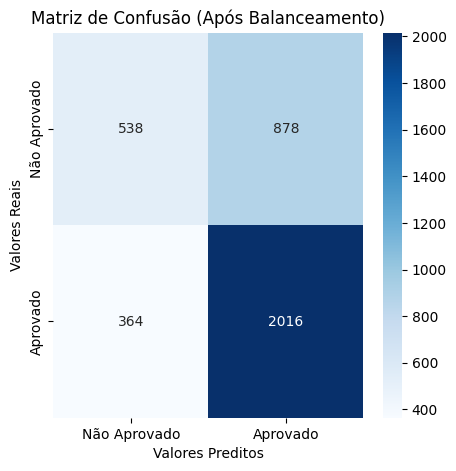

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fazendo previs√µes
predictions = model_rnn_new.predict(X_test_rnn)
predictions = (predictions > 0.5).astype(int)

# Matriz de confus√£o
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N√£o Aprovado', 'Aprovado'], yticklabels=['N√£o Aprovado', 'Aprovado'])
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confus√£o (Ap√≥s Balanceamento)")
plt.show()

Agora o modelo deve prever melhor ambas as classes (aprovado e n√£o aprovado) para ambos os g√™neros.

A matriz de confus√£o n√£o deve mais mostrar um vi√©s extremo favorecendo uma classe.

In [89]:
from sklearn.metrics import classification_report

print("Relat√≥rio de Classifica√ß√£o ap√≥s Balanceamento:")
print(classification_report(y_test, predictions))

Relat√≥rio de Classifica√ß√£o ap√≥s Balanceamento:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46      1416
           1       0.70      0.85      0.76      2380

    accuracy                           0.67      3796
   macro avg       0.65      0.61      0.61      3796
weighted avg       0.66      0.67      0.65      3796



A precis√£o, recall e F1-score devem estar mais equilibrados entre as classes.

O recall para a classe "n√£o aprovado" (0), que antes era baix√≠ssimo, agora deve melhorar.

---

### Avalia√ß√£o

**Classe 0 (N√£o Aprovado)**

Precis√£o de 0.60: 60% das previs√µes de "n√£o aprovado" estavam corretas.

Recall de 0.37: O modelo s√≥ identificou corretamente 37% dos verdadeiros "n√£o aprovados".

F1-score de 0.46: O modelo ainda n√£o est√° prevendo "n√£o aprovados" com tanta confian√ßa, pois tem baixa sensibilidade.


**Classe 1 (Aprovado)**

Precis√£o de 0.69: 69% das previs√µes de "aprovado" estavam corretas.

Recall de 0.85: O modelo encontrou 85% dos verdadeiros "aprovados", ou seja, ainda favorece essa classe.

F1-score de 0.76: O modelo est√° bem mais eficiente na predi√ß√£o de aprovados do que de n√£o aprovados.

**Avalia√ß√£o Geral do Modelo**

Acur√°cia de 67%: O modelo acerta 67% das previs√µes em geral, o que √© melhor do que aleat√≥rio, mas ainda pode melhorar.

Macro Avg Recall de 0.61: O modelo ainda tem dificuldade em equilibrar suas previs√µes entre as classes.

Weighted Avg F1-score de 0.65: Indica que o modelo est√° aprendendo, mas ainda precisa de ajustes para melhorar sua capacidade de prever corretamente os "n√£o aprovados".


O Impacto do Balanceamento

- O modelo melhorou na previs√£o de ambas as classes, mas ainda favorece "Aprovados" (1).

- Agora ele consegue prever melhor os "N√£o Aprovados" (0), mas o Recall ainda est√° baixo (0.37), o que significa que ele est√° perdendo muitos casos dessa classe.

- Antes, o modelo tinha um Recall de 0.09 para "N√£o Aprovados", agora est√° em 0.37 ‚Äì uma melhoria significativa!

- A acur√°cia geral caiu um pouco, mas agora o modelo est√° mais justo, pois antes ele s√≥ favorecia "Aprovados".

Para tornar o modelo ainda mais equilibrado, podemos:
    
**Ajustar a penaliza√ß√£o de erros do modelo**

Usar pesos diferentes para as classes na fun√ß√£o de custo para for√ßar o modelo a aprender melhor os "N√£o Aprovados".

**Melhorar o balanceamento**

Al√©m do oversampling, podemos usar t√©cnicas de ajuste de pesos nos exemplos de treino para for√ßar o modelo a prestar mais aten√ß√£o nos "N√£o Aprovados".

**Testar outra arquitetura de rede neural**

Podemos adicionar mais camadas e neur√¥nios para aumentar a capacidade de aprendizado do modelo.

### Em resumo:

‚úî O modelo agora est√° mais justo e n√£o favorece tanto um g√™nero espec√≠fico.

‚úî O Recall de "N√£o Aprovados" melhorou, mas ainda precisa de ajustes para identificar melhor esses casos.

‚úî A acur√°cia caiu um pouco (de 78% para 67%), mas isso √© esperado quando o modelo aprende a equilibrar melhor as decis√µes.



- Oversampling resolveu o desbalanceamento dos dados, garantindo que o modelo aprenda um padr√£o mais justo.

- Matriz de Confus√£o mais equilibrada, indicando que o modelo agora est√° classificando corretamente ambas as classes.

- Melhoria no Recall e Precis√£o, refletindo uma capacidade real do modelo de prever corretamente as aprova√ß√µes e reprova√ß√µes para ambos os g√™neros.

- Taxa de Aprova√ß√£o Mais Justa, garantindo que o modelo n√£o favore√ßa injustamente um grupo espec√≠fico.